<a href="https://colab.research.google.com/github/SophieShin/MachineLearning/blob/main/SVM_LinearSVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
!pip install mglearn

import mglearn

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify = cancer.target, random_state = 5)


In [5]:
print(X_train.shape)
print(y_train.shape)

(426, 30)
(426,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f103639b750>,
      dtype=object)

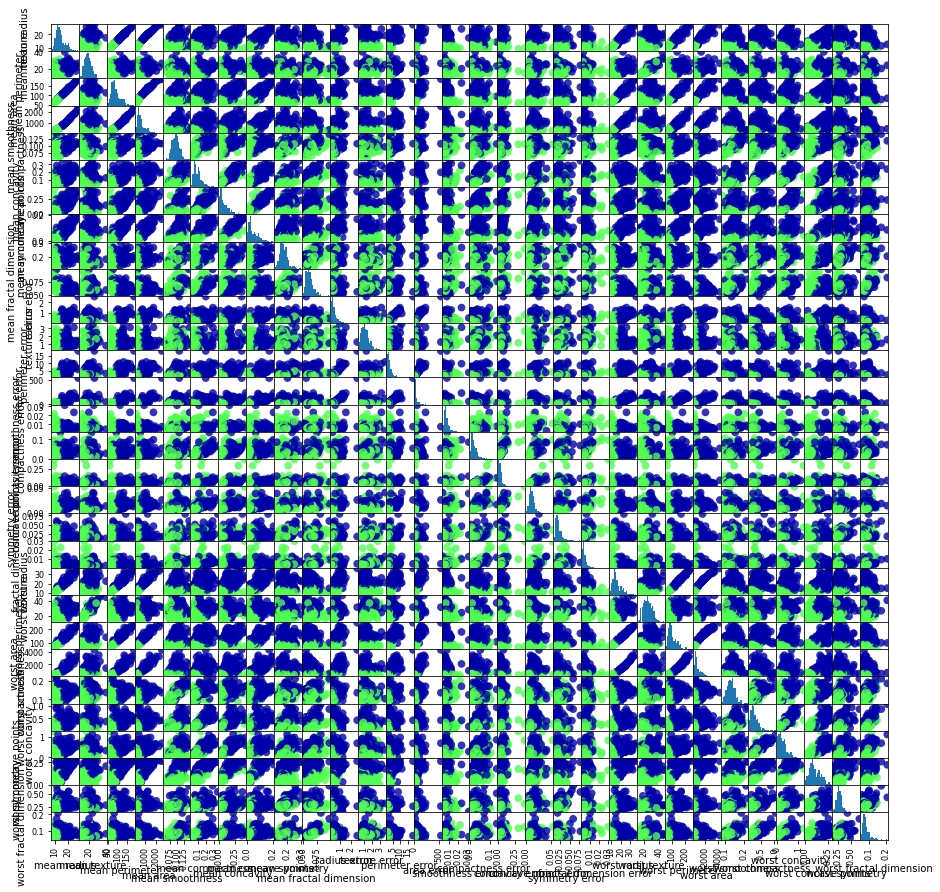

In [6]:

cancer_dataframe = pd.DataFrame(X_train, columns = cancer.feature_names)
pd.plotting.scatter_matrix(cancer_dataframe, c = y_train, figsize = (15,15), marker ='o', hist_kwds = {'bins':20}, s = 60, alpha = 0.8, cmap = mglearn.cm3)

Text(0, 0.5, 'feature size')

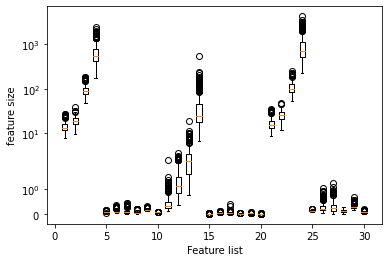

In [8]:
import matplotlib.pyplot as plt


# feature 값의 범위를 시각화해보기
# 차이가 많이 나면 normalization 전처리 하는 게 좋음

plt.boxplot(X_train, manage_ticks = False)     # manage_ticksbool, default: True
                                              #If True, the tick locations and labels will be adjusted to match the boxplot positions.
plt.yscale('symlog')                           # y축 스케일을 log 변환(symmetric log style)
plt.xlabel('Feature list')
plt.ylabel('feature size')

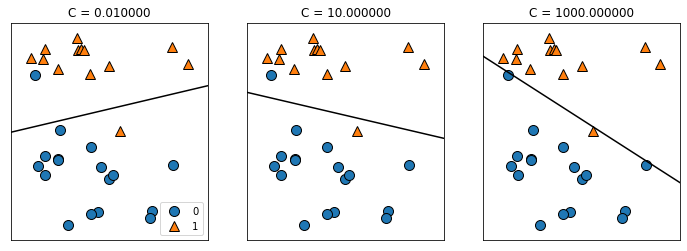

In [9]:
mglearn.plots.plot_linear_svc_regularization()

# regularization parameter인 c값을 낮추면 계수벡터가 0에 가까워지도록 함(강한 규제)
# 데이터 다수에 맞추려고 함/수평에 가까운 경계 제공

# c값을 높이면 개개의 데이터 포인트를 정확하게 분류하려고 함(훈련데이터를 정확히 분류하고자 함)
# 과대적합 가능성 있음

Text(0, 0.5, 'Feature 1')

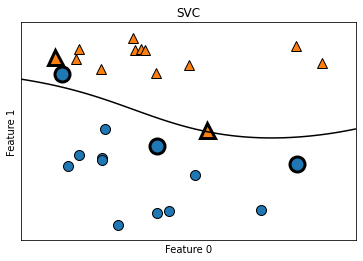

In [15]:
## 이부분 잘 이해가 안됨!!

from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel = 'rbf', C = 10, gamma = 0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps = 0.5)

# 데이터 포인트 그리기

mglearn.discrete_scatter(X[:,0], X[:,1], y)

# SVM
sv = svm.support_vectors_

#dual_coef의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됨

sv_labels = svm.dual_coef_.ravel()>0
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s = 15, markeredgewidth= 3)
plt.title(svm.__class__.__name__)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

In [19]:
## SVM 모델링 위한 전처리 전/후 비교

# 전처리(normalization) 안했을 때

X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], stratify = cancer.target, random_state = 5)

svc = SVC()
svc.fit(X_train, y_train)

print('훈련 정확도: {:.3f}'.format(svc.score(X_train, y_train)))
print('테스트 정확도: {:.3f}'.format(svc.score(X_test, y_test)))


훈련 정확도: 0.913
테스트 정확도: 0.881


In [20]:
# 전처리(normalization) 했을 때

# feature별 min, max-min 구함
# remind! normalization 할 때  (데이터 값 - min)/(max-min)

min_on_training = X_train.min(axis = 0) # axis =0 은 row 기준, 여기선 세로로 이해하는게 쉬움
range_on_training = (X_train - min_on_training).max(axis = 0)

# normalize 하면 데이터를 0~1사이로 만들 수 있음(max = 1, min = 0)
X_train_scaled = (X_train - min_on_training) / range_on_training

# normalized 됐는지 확인
print('특성별 최소값\n', X_train_scaled.min(axis = 0))
print('특성별 최대값\n', X_train_scaled.max(axis = 0))

# 테스트 feature 데이터도 normalization 필요 
# normalization에 필요한 min, max값은 training에 썼던 값으로 씀
X_test_scaled = (X_test - min_on_training) / range_on_training

svc = SVC()
svc.fit(X_train_scaled, y_train)


print('훈련 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

# normalization 하니까 성능이 향상됨

특성별 최소값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최대값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
훈련 정확도: 0.981
테스트 정확도: 0.972


In [21]:
# parameter 튜닝

# C값 증가시켜보기

svc = SVC(C = 1000)
svc.fit(X_train_scaled, y_train)


print('훈련 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

# C값을 높이니(규제를 덜하니) overfitting 현상 발생
# 앞의 c=1 의 경우보다 훈련 성능향상, 테스트 성능감소

훈련 정확도: 1.000
테스트 정확도: 0.951


In [22]:
# C나 gamma값을 감소시켜 규제를 더 강하게 해보기

svc = SVC(C = 0.1)
svc.fit(X_train_scaled,y_train)


print('훈련 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

# c값을 낮추니(규제를 세게 하니) underfitting 발생
# default(c=1)보다 훈련, 테스트 정확도 감소

훈련 정확도: 0.948
테스트 정확도: 0.965


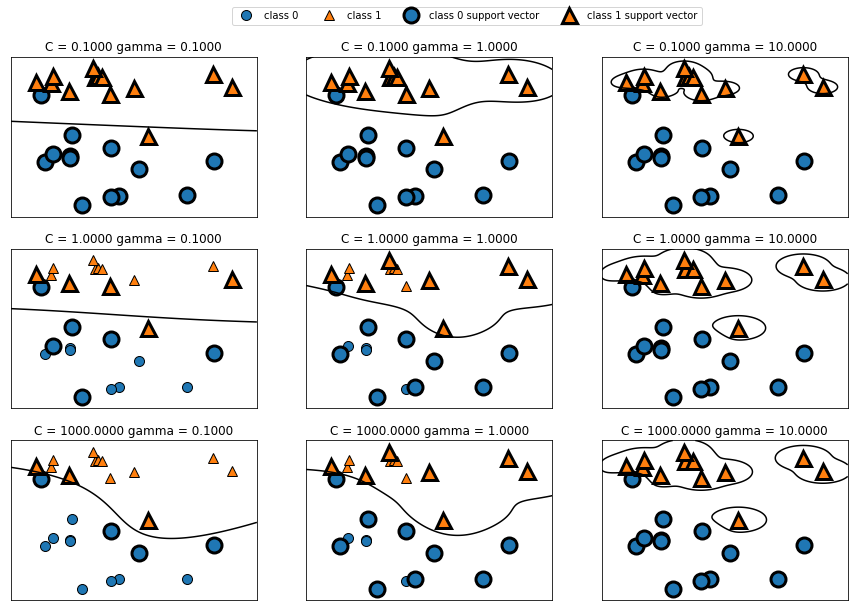

In [25]:
# parameter 조합 다양하게 해보기

## 이부분 코드 잘 이해안됨 다시 보기


fig, axes = plt.subplots(3, 3, figsize = (15, 10))

for ax, C in zip(axes, [-1, 0,  3]):
  for a, gamma in zip(ax, range(-1, 2)):
    mglearn.plots.plot_svm(log_C = C, log_gamma = gamma, ax =a)


axes[0,0].legend(['class 0', 'class 1', 'class 0 support vector', 'class 1 support vector'], ncol=4, loc=(.9, 1.2))